# #3 Extract and translate foreign text from images with Amazon Translate and Amazon Textract

This module walks you through how to extract and translate text in another language from images, such as images of road signs and menu printouts.



## Outline of Module #3
* Project Introduction
* Introduction to Computer Vision
* Optical Character Recognition
* Amazon Textract
* Tutorial
* Related Links
* Final Steps

## Project Introduction

Let's explore a third problem that you can solve with AWS AI/ML services.

Say your business has a target end user who's a professional in his young 20's visiting France for a few weeks. He's an avid foodie and is excited to take advantage of France's food scene. 

He's hungry and stops by a restaurant to grab a bite. There are no images of the menu items and everything is in French. The menu is handwritten on a chalkboard, making it harder to interpret.

Let's build a solution for your customer. This tutorial will walk you through how to extract foreign text from an image using Amazon Textract. Then, it will teach you to to use Amazon Translate to translate this text. 

Your customer's problem can be addressed with both natural language processing and computer vision. 

## Introduction to Computer Vision

**Computer vision** is a technology that uses machine learning to identify visual patterns and images. 

Amazon is currently using computer vision with the Amazon Go store. The Amazon Go store allows customers to pick up groceries and walk out without paying at a cashier. In order to determine who took which products, Amazon combines cameras and computer vision to track a customer throughout the store. Computer vision is also necessary to detect which specific objects the customer grabs from the shelf, so they can be charged accordingly. 

Amazon also uses computer vision in their fulfillment centers. Computer vision systems are used in order to track where each item is located within the building.


## Optical Character Recognition (OCR)

Let's dive into OCR in order to understand how you can extract the text from the image of the menu.  

Optical Character Recognition (OCR) is an early computer vision technique that is used to recognize the text within an image. It can be used to transform typed, handwritten, or printed text into text that the machine understands. If you're a business who wants to convert a lot of documents into a digital format, you use OCR to speed up the process. 

OCR technologies train on a set of images of various characters, and learn how to recognize each character. However, OCR is limited because it can convert text data, but it can't  intellligently interpret the input. 


## Before You Begin
Each of the Jupyter notebooks in this repository requires an _execution role_. An execution role is the role that gives SageMaker permission to perform operations on your behalf. You will use Amazon Translate and Amazon Textract in this notebook. You will need to grant permissions to access the services you want to use. For more information, see [Identity and Access Management (IAM) roles required for Amazon Comprehend](https://docs.aws.amazon.com/IAM/latest/UserGuide/id.html).

In order to set up your role policies, complete the following steps:

1. On the [Amazon SageMaker console](https://console.aws.amazon.com/sagemaker), choose the notebook instance that you created to launch these modules. 
3. Scroll to **Permissions and encryption** and choose the IAM role ARN hyperlink. 
3. Choose **Attach policies.** 
4. Search up and select the policies "AmazonTranslateFullAccess" and "AmazonTextractFullAccess." 
5. Choose **Attach policy.**


# Amazon Services in this solution

## Amazon Textract

Amazon Textract is a machine learning service that automatically extracts text, handwriting and data from scanned documents that goes beyond simple optical character recognition (OCR) to identify, understand, and extract data from forms and tables. 

For example, it can look at a table and understand the relationship between different items in the table. Textract has been trained on a large dataset of documents in order to learn how to process any possible input from the user. It uses deep learning to understand the connections between different words on the screen.

In this module, you use Amazon Textract to extract food and drink options from a picture of a menu. 


## Amazon Translate
Amazon Translate is a neural machine translation service that delivers fast and customizable language translation. It  automates translation tasks such as localizing content for different geographic locations and translating large volumes of text for analysis. 

In this module, you use Amazon Translate to translate the French cafe's menu items into English. 


## Tutorial: Solving the problem of extracting and translating foreign text from images


You will use **Amazon Textract** and **Amazon Translate** to create an app that scans a menu, extracts the text, and translates it into English.

Tutorial Overview:

1. Upload pdf of French menu to S3 Bucket
2. Run text detection functions
3. Translate text from French into English using Amazon Translate 
4. Return output to user

In [ ]:
import boto3
import sagemaker


You will set up our client and upload the image of the menu into a bucket. Here's what the image looks like. 



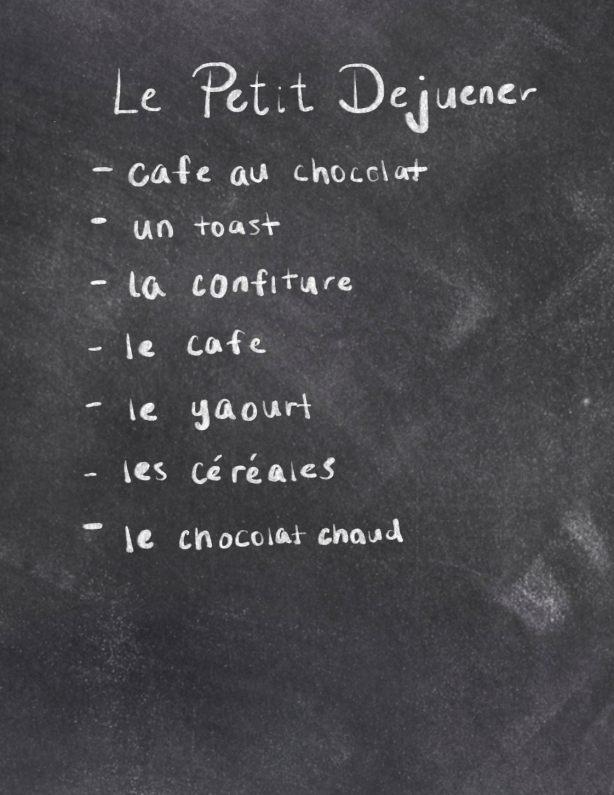

In [ ]:
s3 = boto3.client('s3')
sess = sagemaker.Session()
bucket_name = sess.default_bucket()                    # Set to default S3 bucket
filename = 'chalkboardmenu.png'
s3.upload_file(filename, bucket_name, filename)

Now, let's set up the textract client and open our desired document.

In [ ]:
textract = boto3.client('textract')

# Call Amazon Textract
with open(filename, "rb") as document:
    response = textract.detect_document_text(
        Document={
            'Bytes': document.read(),
        }
    )

#print(response)


Let's call the Amazon Translate client and use it to translate the block of text. 

In [ ]:

# Amazon Translate client
translate = boto3.client('translate')

print ('')
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[94m' +  item["Text"] + '\033[0m')
        result = translate.translate_text(Text=item["Text"], SourceLanguageCode="fr", TargetLanguageCode="en")
        print ('\033[92m' + result.get('TranslatedText') + '\033[0m')
    print ('')


You can quickly look through the menu and check out the items.

## Related Links

Congratulations, you've just completed an introductory course to machine learning using AWS. 

You now have experience with Amazon Translate, Amazon Polly, Amazon Comprehend, and Amazon Textract. You can continue working with these services for your own projects. 

You can also check out Amazon's other resources for machine learning education. 
* For a deep dive into Amazon SageMaker and other Amazon AI services, check out this [AWS Coursera course](https://www.coursera.org/learn/aws-machine-learning).
* To explore reinforcement learning by training an interactive virtual racecar, check out [AWS DeepRacer](https://aws.amazon.com/deepracer/).
* For further tutorials on projects you can make with Amazon AI services, check out these videos offered by [AWS Training & Certification](https://www.aws.training/LearningLibrary?query=&filters=Domain%3A30&from=0&size=15&sort=_score). 


## Final Steps

Shut down each kernel.
1. On the left side bar, go to the Module1 Folder. 
2. Right click on the Jupyter Notebook "#1 Translate text into spoken translations with Amazon Translate and Amazon Polly."
3. Choose 'Shut Down Kernel.'
4. Repeat steps 2-3 for 

Shut down this Jupyter Notebook instance. 

1. Go to the [**Amazon SageMaker Notebook Instances**](https://console.aws.amazon.com/sagemaker/home?region=us-east-1#/notebook-instances) page. 
2. Choose the circle next to your custom notebook instance.
3. Open the **Actions** drop-down menu. 
4. Click **Stop.** Wait for a few minutes for the instance to shut down.

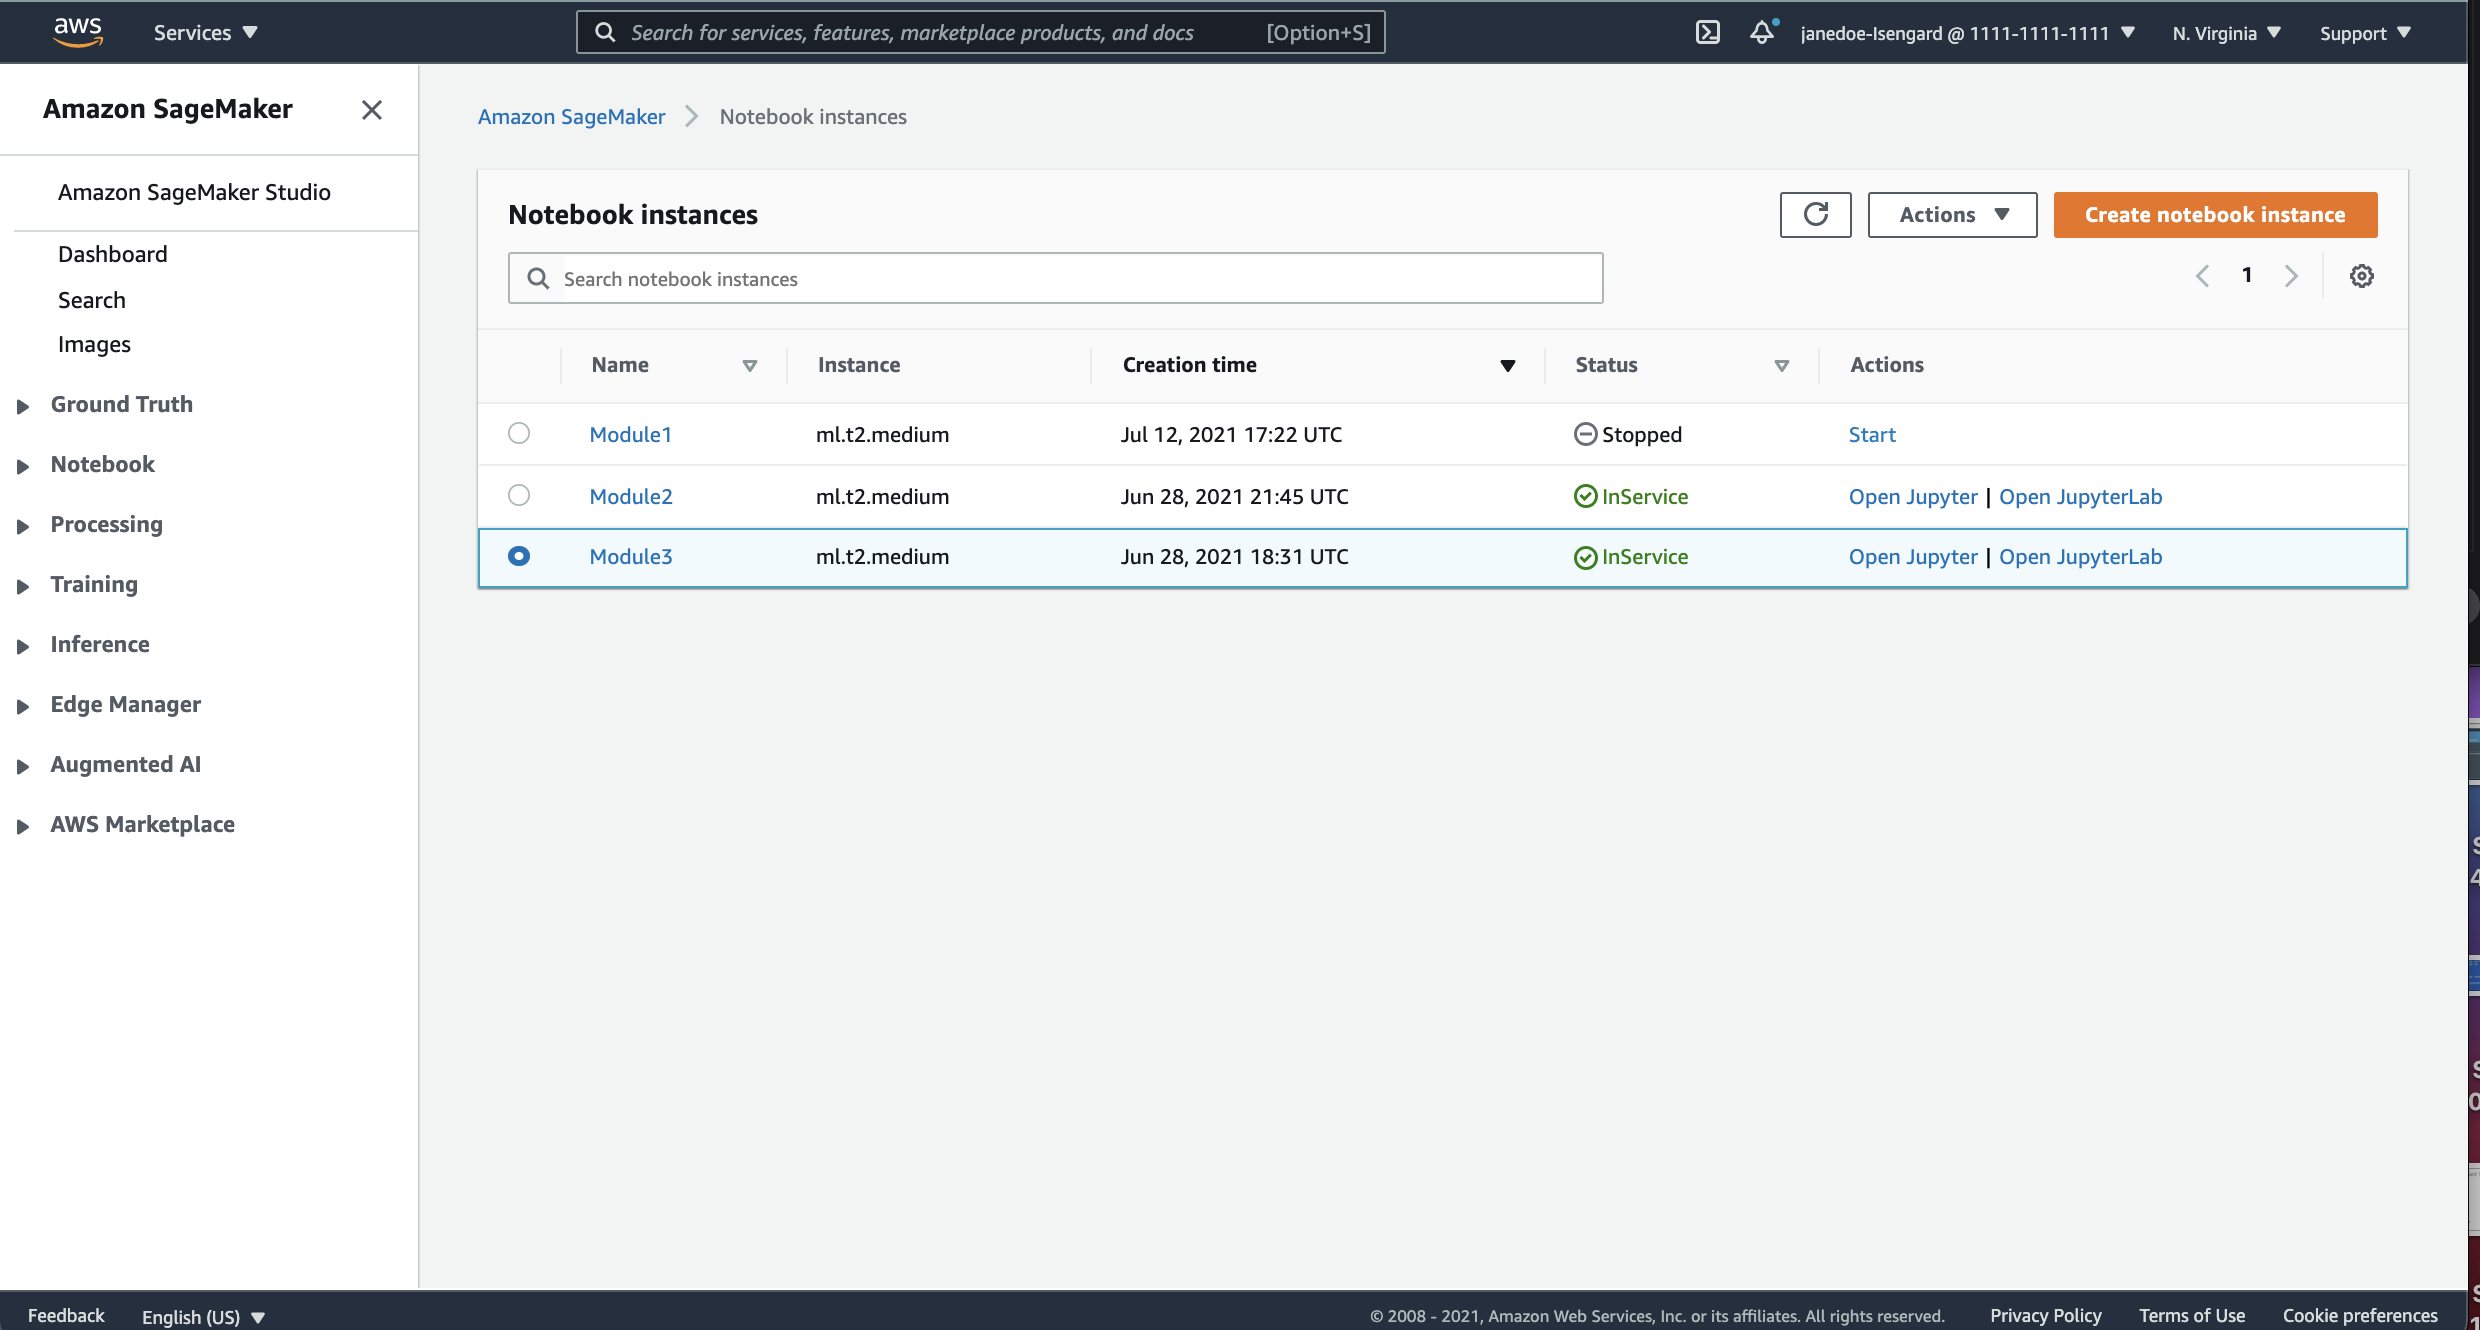